# Thyroid Cancer Classisification Using Machine Learning

#### This notebook uses various machine learning models to diagnose if patients have a benign or malignant thyroid cancer.

The dataset for the "Thyroid Cancer Prediction" project comprises a rich collection of clinical and demographic features of individuals. These features are instrumental in assessing the likelihood of a thyroid cancer diagnosis. Here is a description of the dataset featu
Mean Radius: This feature likely represents the average size or radius of thyroid nodules or tumors in individuals. It can provide insights into the physical characteristics of thyroid growths.


**Mean Texture:** Texture in this context may describe the structural properties or consistency of the thyroid tissue. It could help in identifying irregularities.

**Mean Perimeter:** Perimeter refers to the measurement of the outer boundary of thyroid growths. This feature offers information about the shape and extent of thyroid nodules.

**Mean Area:** The area feature likely represents the surface area of thyroid growths. It is a crucial parameter for evaluating the size and extent of thyroid tumors.

**Mean Smoothness** Smoothness could indicate the evenness or regularity of thyroid tissue. It may help in identifying irregularities or variations in the tissue structure.

**Diagnosis:** The diagnosis feature serves as the target variable. It categorizes individuals into classes, typically "benign" and "malignant." This is the label that machine learning models aim to predict.

**Import Libraries**

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns  
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import subprocess
import graphviz

from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


**Read in the data**

Link to dataset: https://www.kaggle.com/datasets/bibin2001/thyroid-cancer-predition/

In [110]:
data = pd.read_csv('Thyroid_train.csv')

In [111]:
from IPython.display import display
display(data)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


**Finding correlarions between the features using a heatmap**

<Axes: >

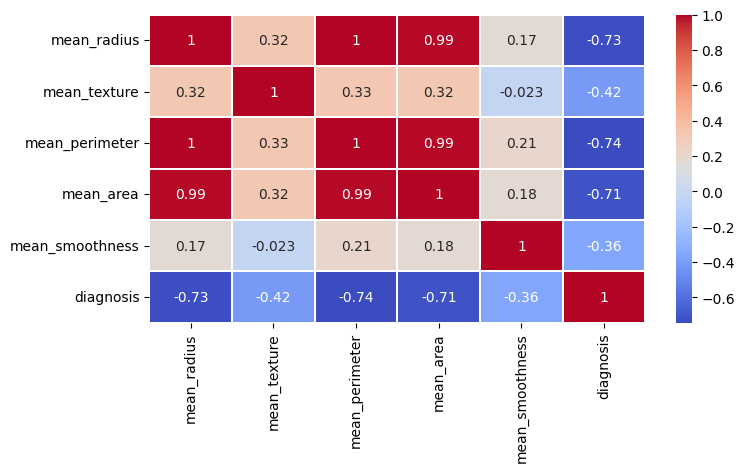

In [113]:
data_corr= data.corr()       
plt.figure(figsize=(8,4))
sns.heatmap(data_corr, cmap='coolwarm', linewidths=0.1, annot=True, linecolor='white')

**Finding correlarions between the features using a pair plot**

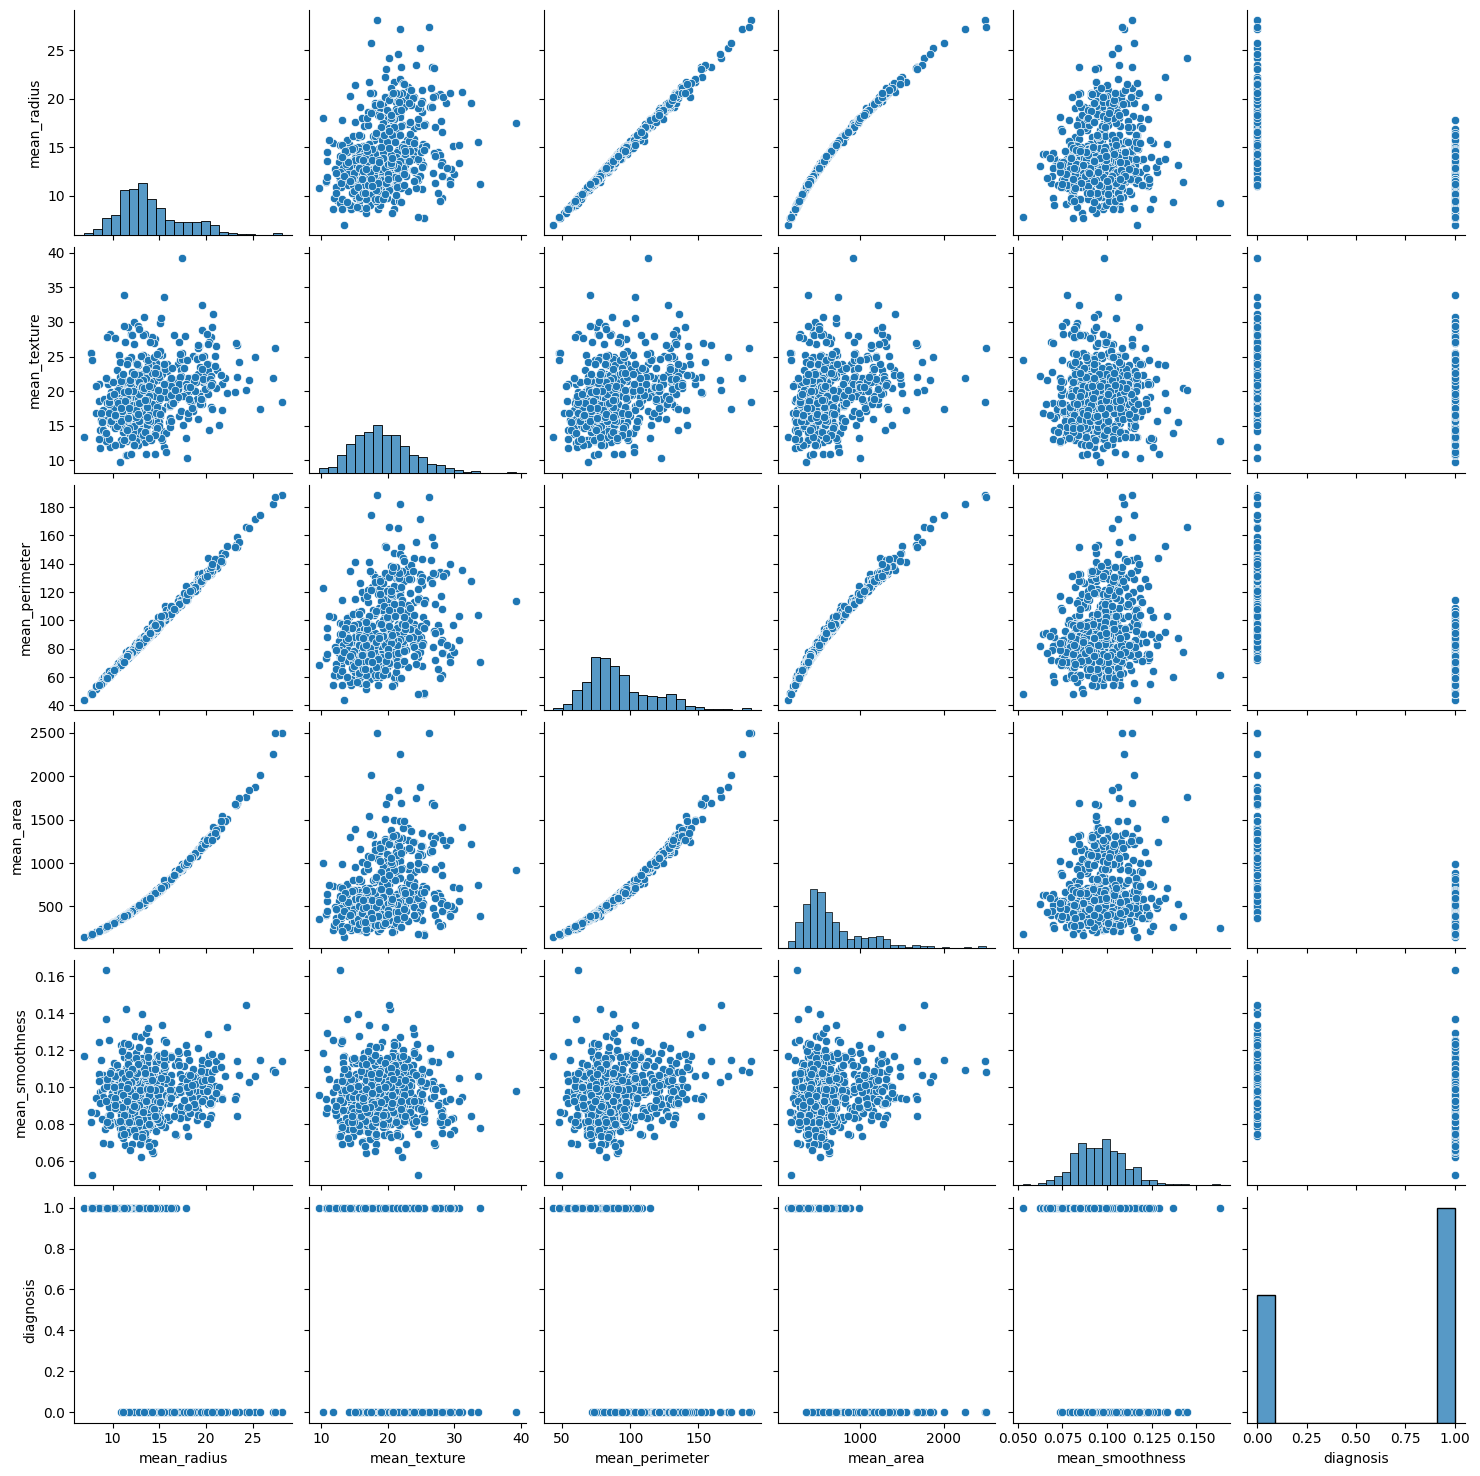

In [114]:
sns.pairplot(data)
plt.show()

**Drop the mean radius from our data as it has 100% correlation with mean perimeter**

In [115]:
data = data.drop(['mean_radius'], axis=1)

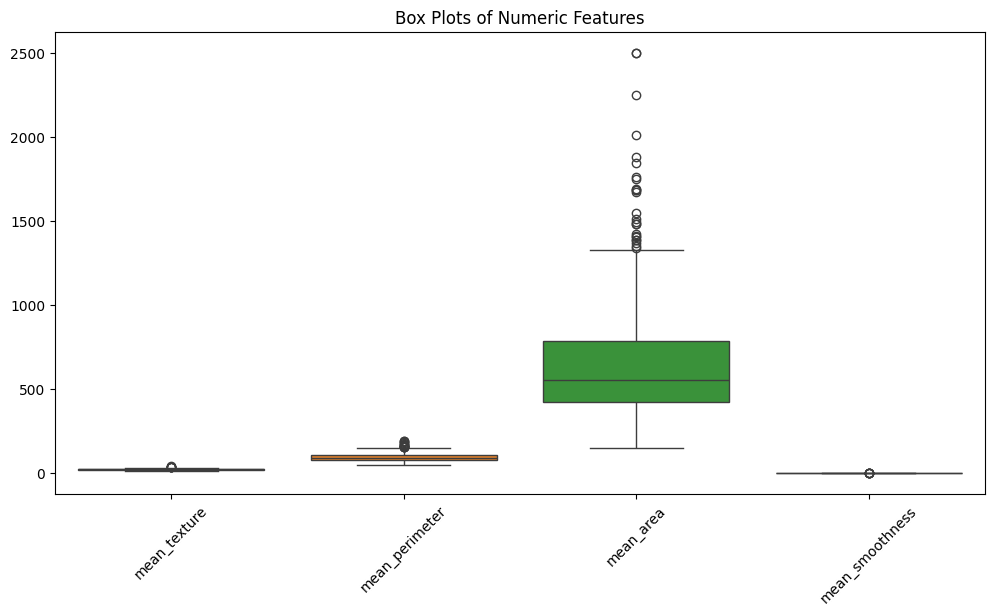

<Figure size 1200x600 with 0 Axes>

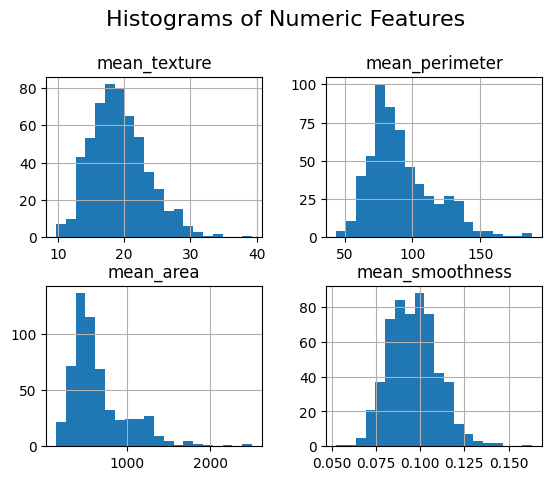

In [116]:
# Visualize box plots for each numeric feature
plt.figure(figsize=(12, 6))
sns.boxplot(data=data.drop(columns=['diagnosis']))
plt.title('Box Plots of Numeric Features')
plt.xticks(rotation=45)
plt.show()

# Visualize histograms for each numeric feature
plt.figure(figsize=(12, 6))
data.drop(columns=['diagnosis']).hist(bins=20)
plt.suptitle('Histograms of Numeric Features', x=0.5, y=1.02, fontsize=16)
plt.show()

**Calculate value counts for the 'diagnosis' column**

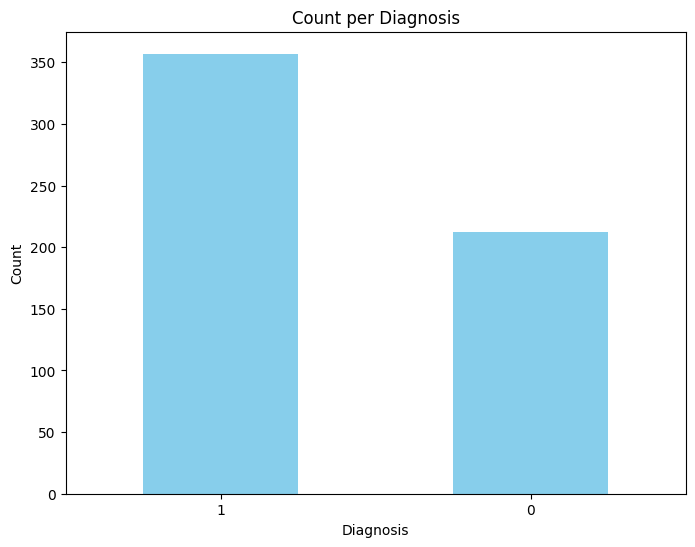

In [117]:
diagnosis_counts = data['diagnosis'].value_counts()

# Plot the value counts
plt.figure(figsize=(8, 6))
diagnosis_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Count per Diagnosis')
plt.xticks(rotation=0)
plt.show()

**Data looks balanced enough and is ready to split into training (80%) and testing (20%) sets**

In [118]:
X = data.drop('diagnosis', axis=1)  
y = data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_texture     569 non-null    float64
 1   mean_perimeter   569 non-null    float64
 2   mean_area        569 non-null    float64
 3   mean_smoothness  569 non-null    float64
dtypes: float64(4)
memory usage: 17.9 KB


**Standardize features**

In [120]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Training SVM with different kernels and comparing results**

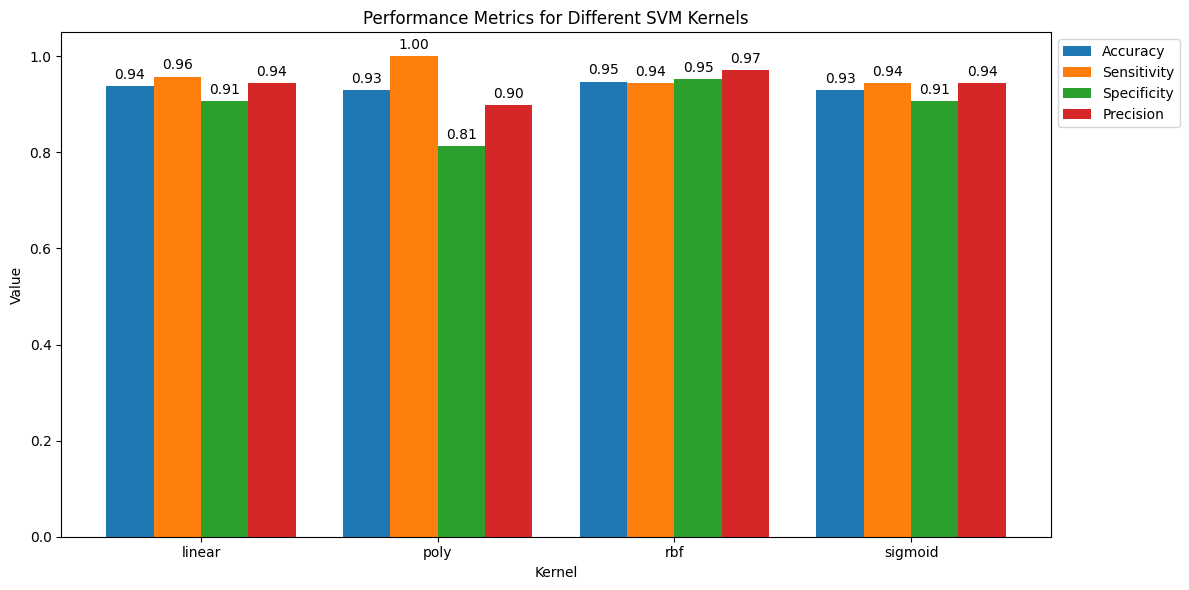

In [121]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

accuracy_values = []
sensitivity_values = []
specificity_values = []
precision_values = []

for kernel in kernels:
    svm = SVC(kernel=kernel, C=10, gamma=0.2, random_state=1)
    svm.fit(X_train_scaled, y_train)
    y_pred = svm.predict(X_test_scaled)

    # Calculate accuracy, recall, specificity, and precision
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    true_negatives = conf_matrix[0, 0]
    false_positives = conf_matrix[0, 1]
    specificity = true_negatives / (true_negatives + false_positives)
    precision = precision_score(y_test, y_pred)

    accuracy_values.append(accuracy)
    sensitivity_values.append(recall)
    specificity_values.append(specificity)
    precision_values.append(precision)

    results[kernel] = {
        'Accuracy': accuracy,
        'Sensitivity': recall,
        'Specificity': specificity,
        'Precision': precision
    }

# Plot the metrics for each kernel with values on top of the bars
metrics = ['Accuracy', 'Sensitivity', 'Specificity', 'Precision']
values = [accuracy_values, sensitivity_values, specificity_values, precision_values]

fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.2
index = np.arange(len(kernels))

for i, (metric, value) in enumerate(zip(metrics, values)):
    bars = ax.bar(index + i * bar_width, value, bar_width, label=metric)
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

ax.set_xlabel('Kernel')
ax.set_ylabel('Value')
ax.set_title('Performance Metrics for Different SVM Kernels')
ax.set_xticks(index + bar_width * 1.5)
ax.set_xticklabels(kernels)
legend = ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

**Selecting two important features to train SVM linear and rbf**

In [122]:

feature_names = list(X.columns) 

# Get indices of the features
mean_smoothness = feature_names.index('mean_texture')
mean_perimeter = feature_names.index('mean_perimeter')


# Extract the important features using their indices
X_train_important_features = X_train_scaled[:, [mean_smoothness, mean_perimeter]]
X_test_important_features = X_test_scaled[:, [mean_smoothness, mean_perimeter]]


**Training SVM with two features and various different gamma values for the RBF kernel and visualizing the decision boundary**

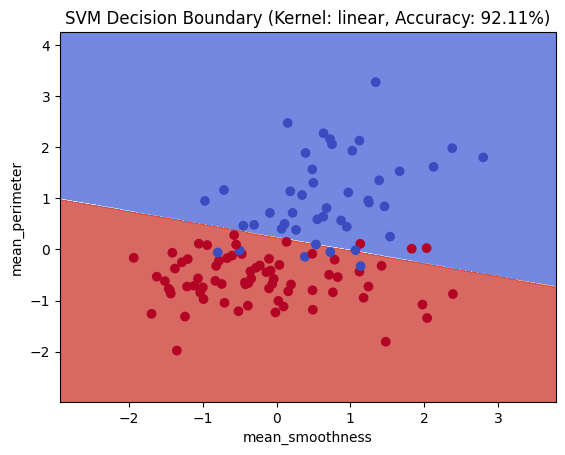

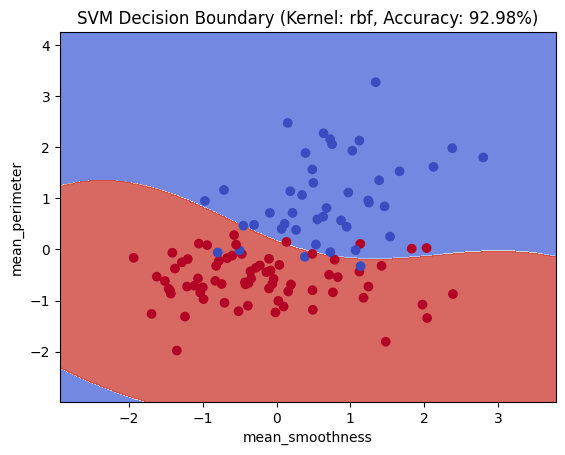

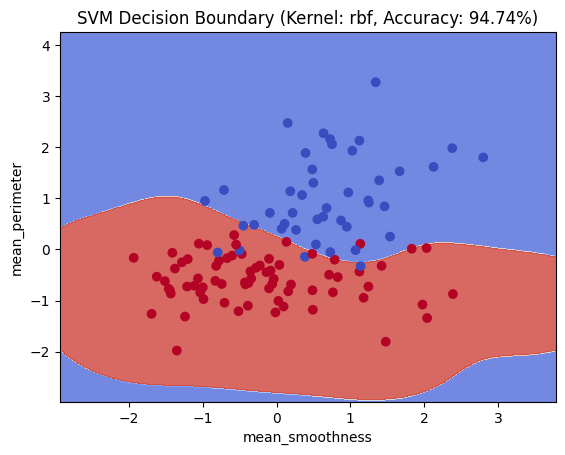

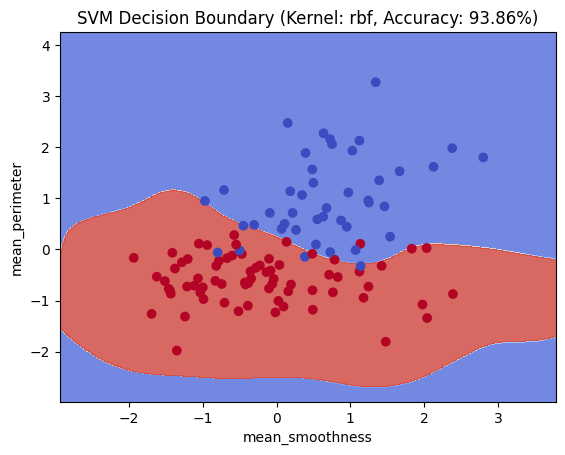

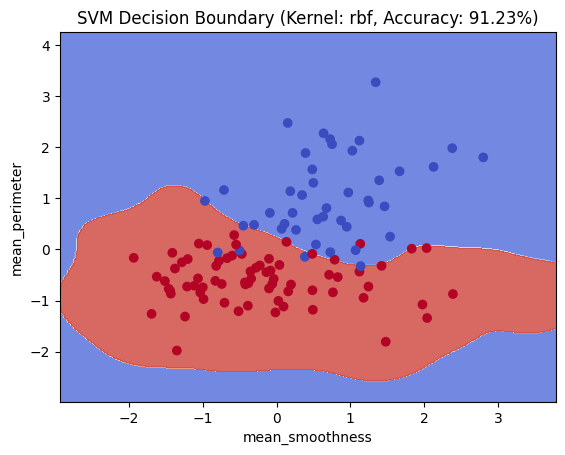

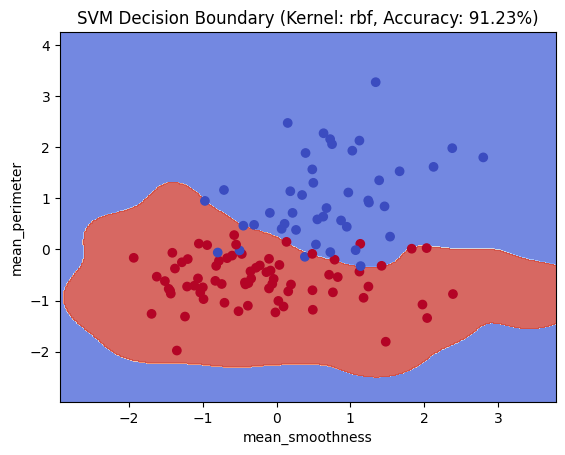

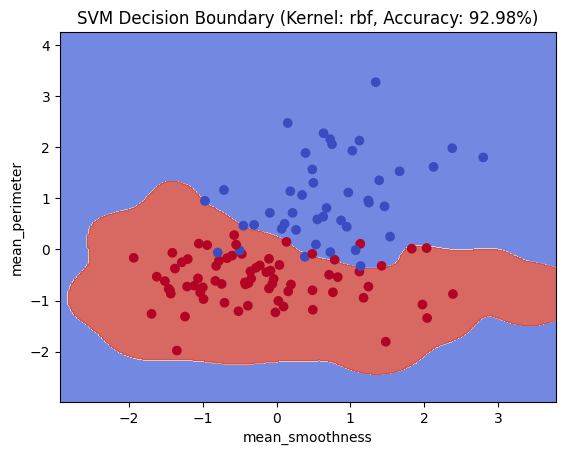

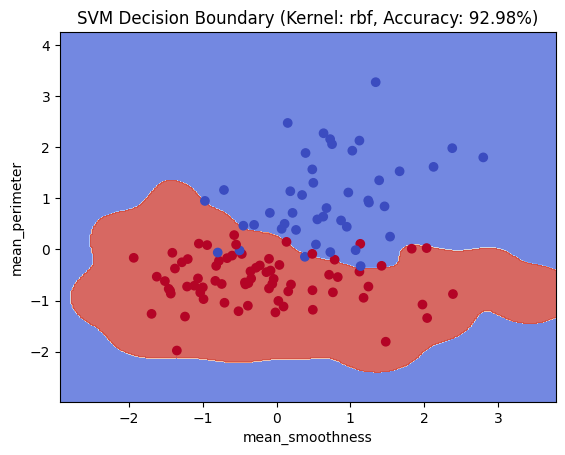

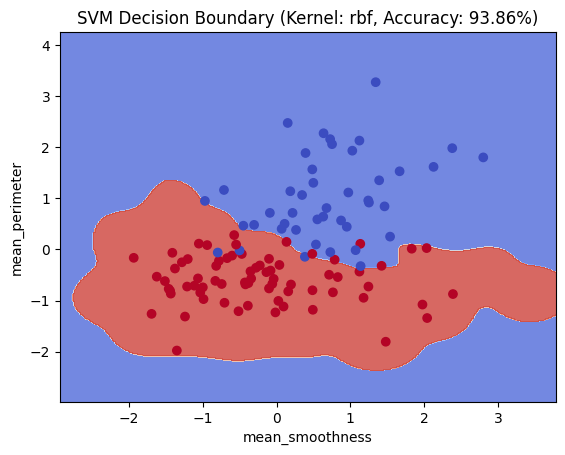

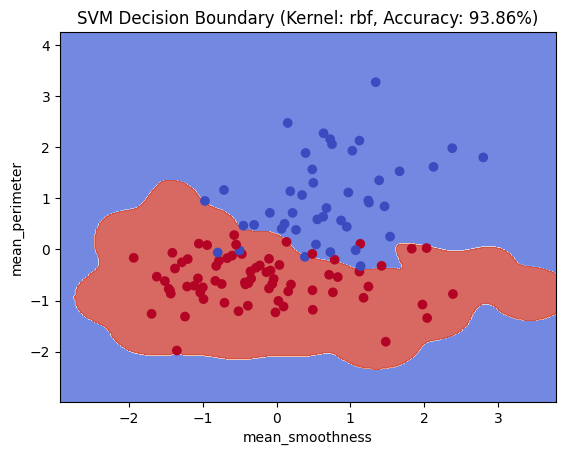

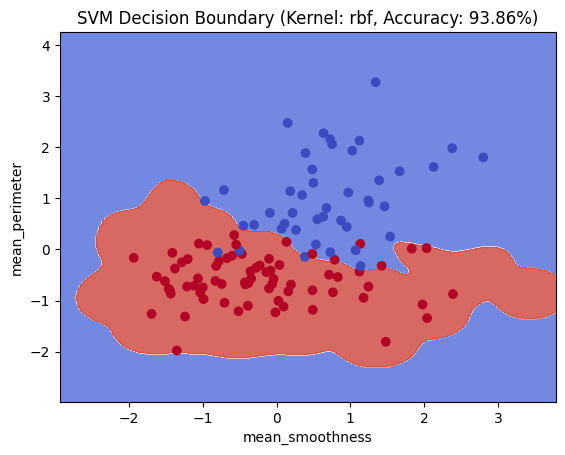

In [124]:
def plot_decision_boundary(X, y, model, kernel):
    h = .02  
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('mean_smoothness')
    plt.ylabel('mean_perimeter')
    plt.title(f'Decision Boundary using {kernel} Kernel')

    # Calculate accuracy
    predicted = model.predict(X)
    accuracy = accuracy_score(y, predicted)
    
    plt.title(f'SVM Decision Boundary (Kernel: {kernel}, Accuracy: {accuracy:.2%})')
    
    plt.show()

for kernel in ['linear', 'rbf']:
    if kernel == 'rbf':
        for i in range(1,50,5):
            gamma = .2*i
            svm = SVC(kernel=kernel, random_state=1, gamma=gamma, C=1.0)
            svm.fit(X_train_important_features, y_train)
            plot_decision_boundary(X_test_important_features, y_test, svm, kernel)
    else:
        svm = SVC(kernel=kernel, random_state=1, gamma=.2, C=1.0)
        svm.fit(X_train_important_features, y_train)
        plot_decision_boundary(X_test_important_features, y_test, svm, kernel)


**Select the best gamma from the previous results and capture the various metrics that are important for our study**

        Metric     Value
0     Accuracy  0.947368
1  Sensitivity  0.943662
2  Specificity  0.953488
3    Precision  0.971014


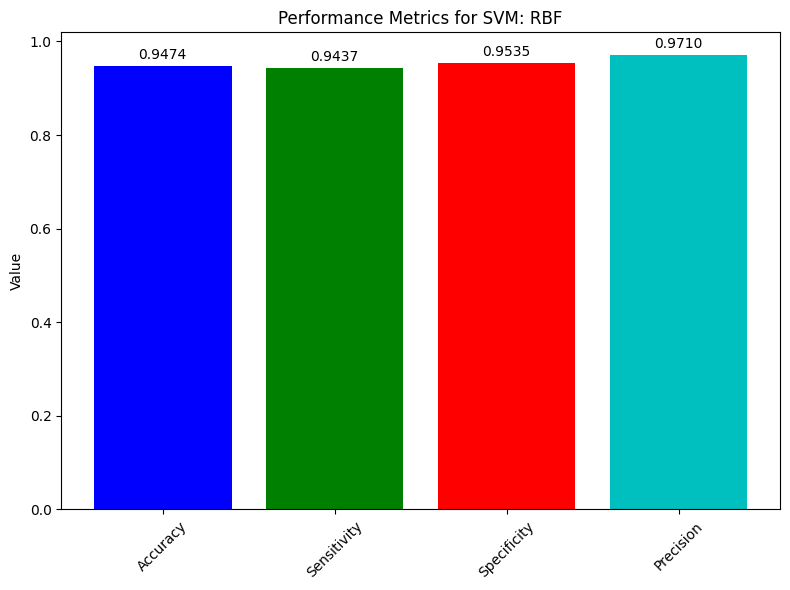

In [125]:
svm = SVC(kernel='rbf', C=10, gamma=.2, random_state=1)
svm.fit(X_train_scaled, y_train)
y_pred = svm.predict(X_test_scaled)

# Calculate accuracy, sensitivity, specificity, precision, and F1-score
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
true_negatives = conf_matrix[0, 0]
false_positives = conf_matrix[0, 1]
specificity = true_negatives / (true_negatives + false_positives)
precision = precision_score(y_test, y_pred)

# Create a DataFrame to display the metrics
results_rbf_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision'],
    'Value': [accuracy, recall, specificity, precision],
})

print(results_rbf_df)

# Create a bar chart to visualize the metrics
fig, ax = plt.subplots(figsize=(8, 6))

bars = ax.bar(results_rbf_df['Metric'], results_rbf_df['Value'], color=['b', 'g', 'r', 'c', 'm'])
ax.set_ylabel('Value')
ax.set_title('Performance Metrics for SVM: RBF')

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3), 
        textcoords="offset points",
        ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Train a Logistic Regression model without regularization and compare the results with the test and training data to look for any overfitting**

In [144]:
lr_model = LogisticRegression(max_iter=1000000)
lr_model.fit(X_train_scaled, y_train)


# Calculate predicted probabilities for the training and test sets
y_train_pred_prob = lr_model.predict_proba(X_train_scaled)[:, 1]
y_test_pred_prob = lr_model.predict_proba(X_test_scaled)[:, 1]


y_train_true = (y_train == 1).astype(int)
y_test_true = (y_test == 1).astype(int)

# Calculate accuracy for training and test sets
train_accuracy = accuracy_score(y_train_true, (y_train_pred_prob > 0.5).astype(int))
test_accuracy = accuracy_score(y_test_true, (y_test_pred_prob > 0.5).astype(int))


# Calculate confusion matrix for training and test sets
train_conf_matrix = confusion_matrix(y_train_true, (y_train_pred_prob > 0.5).astype(int))
test_conf_matrix = confusion_matrix(y_test_true, (y_test_pred_prob > 0.5).astype(int))

# Calculate sensitivity (true positive rate or recall) for training and test sets
train_sensitivity = recall_score(y_train_true, (y_train_pred_prob > 0.5).astype(int))
test_sensitivity = recall_score(y_test_true, (y_test_pred_prob > 0.5).astype(int))

# Calculate specificity (true negative rate) for training and test sets
train_specificity = train_conf_matrix[0, 0] / (train_conf_matrix[0, 0] + train_conf_matrix[0, 1])
test_specificity = test_conf_matrix[0, 0] / (test_conf_matrix[0, 0] + test_conf_matrix[0, 1])

# Calculate precision for training and test sets
train_precision = precision_score(y_train_true, (y_train_pred_prob > 0.5).astype(int))
test_precision = precision_score(y_test_true, (y_test_pred_prob > 0.5).astype(int))




**Plot the results for the Logistic Regression model without regularization** 

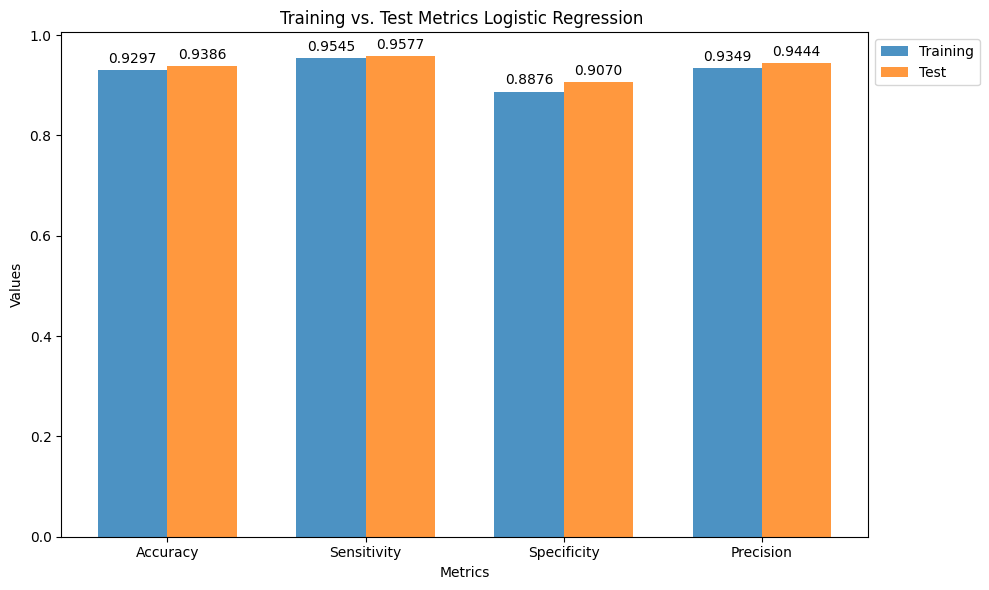

In [145]:
# Sample values (replace with your actual metrics)
metrics = ['Accuracy', 'Sensitivity', 'Specificity', 'Precision']
training_values = [train_accuracy, train_sensitivity, train_specificity, train_precision]
test_values = [test_accuracy, test_sensitivity, test_specificity, test_precision]


# Create subplots for better visualization
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the training and test metrics
bar_width = 0.35
index = range(len(metrics))
bar1 = ax.bar(index, training_values, bar_width, label='Training', alpha=0.8)
bar2 = ax.bar([i + bar_width for i in index], test_values, bar_width, label='Test', alpha=0.8)

# Add labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Training vs. Test Metrics Logistic Regression ')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(metrics)
legend = ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Display the values on top of the bars
for bar in bar1 + bar2:
    height = bar.get_height()
    ax.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')



# Show the plot
plt.tight_layout()
plt.show()


**Now, Calculate testing accuracy with L1 and L2 regularization models as well as different regularization strengths for L2 regularization**

Testing Accuracy without Regularization: 0.9385964912280702
Testing Accuracy with L1 Regularization: 0.9473684210526315
Testing Accuracy with L2 Regularization: 0.9385964912280702


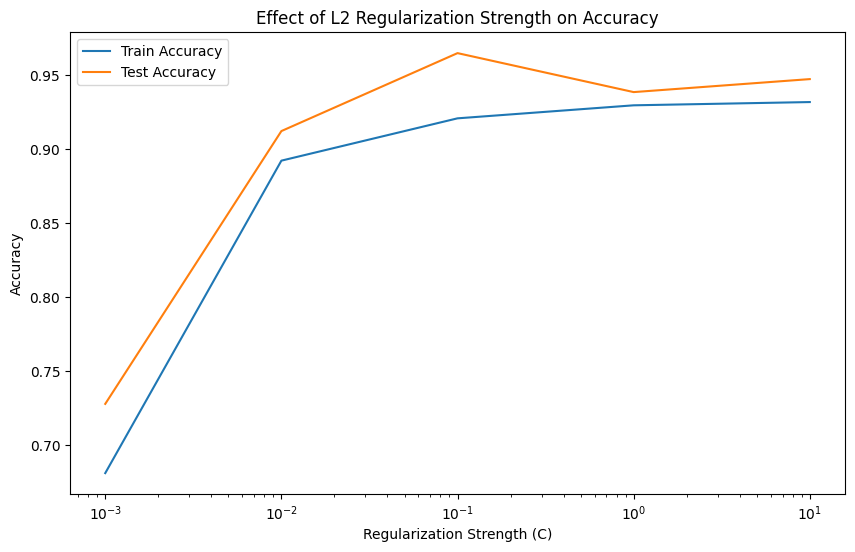

Top Informative Features for L1 Regularization:
['mean_perimeter', 'mean_smoothness']
Top Informative Features for L2 Regularization:
['mean_perimeter', 'mean_area']


In [148]:
# Calculate testing accuracy for the model without regularization
test_accuracy_lr = accuracy_score(y_test, lr_model.predict(X_test_scaled))

# Train Logistic Regression models with L1 and L2 regularization
l1_model = LogisticRegression(penalty='l1', max_iter=10000000, solver='liblinear')
l2_model = LogisticRegression(penalty='l2', max_iter=10000000)

l1_model.fit(X_train_scaled, y_train)
l2_model.fit(X_train_scaled, y_train)

# Calculate testing accuracy for L1 and L2 models
test_accuracy_l1 = accuracy_score(y_test, l1_model.predict(X_test_scaled))
test_accuracy_l2 = accuracy_score(y_test, l2_model.predict(X_test_scaled))

# Print results
print("Testing Accuracy without Regularization:", test_accuracy_lr)
print("Testing Accuracy with L1 Regularization:", test_accuracy_l1)
print("Testing Accuracy with L2 Regularization:", test_accuracy_l2)

# Get the coefficients (feature weights) for L1 and L2 models
l1_coefs = l1_model.coef_[0]
l2_coefs = l2_model.coef_[0]

# Create a list of regularization strengths to test
regularization_strengths = [0.001, 0.01, 0.1, 1, 10]

# Lists to store training and testing accuracies for different regularization strengths
train_accuracies = []
test_accuracies = []

# Iterate through different regularization strengths for L2 regularization
for strength in regularization_strengths:
    model = LogisticRegression(penalty='l2', C=strength, max_iter=10000)
    model.fit(X_train_scaled, y_train)
    
    # Calculate training and testing accuracies
    train_accuracy = accuracy_score(y_train, model.predict(X_train_scaled))
    test_accuracy = accuracy_score(y_test, model.predict(X_test_scaled))
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot regularization strengths vs. accuracies
plt.figure(figsize=(10, 6))
plt.semilogx(regularization_strengths, train_accuracies, label="Train Accuracy")
plt.semilogx(regularization_strengths, test_accuracies, label="Test Accuracy")
plt.xlabel("Regularization Strength (C)")
plt.ylabel("Accuracy")
plt.title("Effect of L2 Regularization Strength on Accuracy")
plt.legend()
plt.show()

# Print top informative features for L1 and L2 models
print("Top Informative Features for L1 Regularization:")
top_features_l1 = [feature for _, feature in sorted(zip(np.abs(l1_coefs), feature_names), reverse=True)[:2]]
print(top_features_l1)

print("Top Informative Features for L2 Regularization:")
top_features_l2 = [feature for _, feature in sorted(zip(np.abs(l2_coefs), feature_names), reverse=True)[:2]]
print(top_features_l2)


**Using the best performing regularization strength(10^-1) from the graph above as well as the best model  (L1 regularzation) test the metrics for our study**

        Metric     Value
0     Accuracy  0.964912
1  Sensitivity  1.000000
2  Specificity  0.906977
3    Precision  0.946667


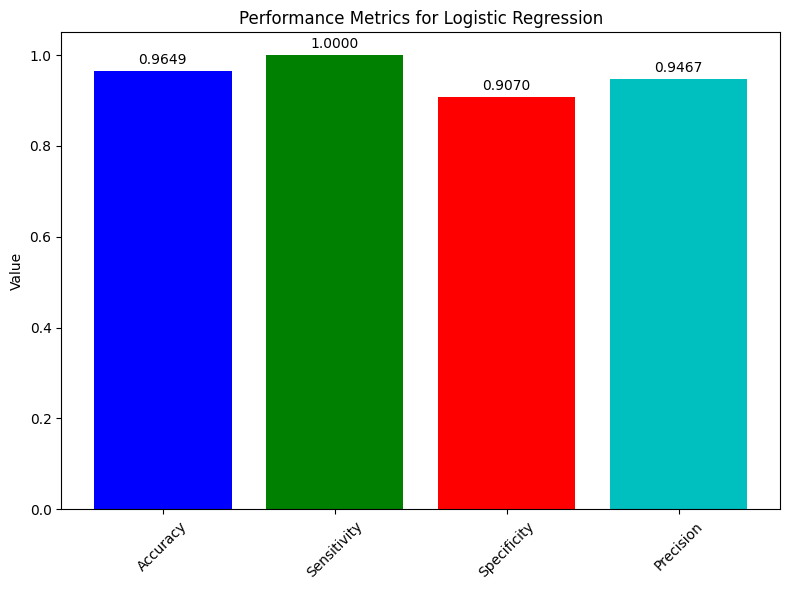

In [156]:

# Train a Logistic Regression model with specified parameters
lr_model = LogisticRegression(penalty='l2', C=.1, max_iter=10000)
lr_model.fit(X_train_scaled, y_train)

# Predict using the Logistic Regression model
y_pred = lr_model.predict(X_test_scaled)

# Calculate accuracy, sensitivity, specificity, precision, and F1-score
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
true_negatives = conf_matrix[0, 0]
false_positives = conf_matrix[0, 1]
specificity = true_negatives / (true_negatives + false_positives)
precision = precision_score(y_test, y_pred)

# Create a DataFrame to display the metrics
results_LogisticRegression_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision'],
    'Value': [accuracy, recall, specificity, precision],
})

print(results_LogisticRegression_df)

# Create a bar chart to visualize the metrics
fig, ax = plt.subplots(figsize=(8, 6))

bars = ax.bar(results_LogisticRegression_df['Metric'], results_LogisticRegression_df['Value'], color=['b', 'g', 'r', 'c', 'm'])
ax.set_ylabel('Value')
ax.set_title('Performance Metrics for Logistic Regression')

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3), 
        textcoords="offset points",
        ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**We will now apply the Decion tree classisfier model with various tree depths and impurty measures**

In [130]:
tree_depths = [1,3,6,9,12,15,18]
impurity_measures = ['gini', 'entropy']
results = []

for depth in tree_depths:
    for impurity in impurity_measures:
        
        clf = DecisionTreeClassifier(max_depth=depth, criterion=impurity, random_state=50)
        clf.fit(X_train, y_train)  
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        results.append({
            'Depth': depth,
            'Impurity': impurity,
            'Accuracy': accuracy * 100,
        })


results_df = pd.DataFrame(results)
print(results_df)

    Depth Impurity   Accuracy
0       1     gini  92.105263
1       1  entropy  92.105263
2       3     gini  90.350877
3       3  entropy  91.228070
4       6     gini  92.105263
5       6  entropy  92.105263
6       9     gini  91.228070
7       9  entropy  90.350877
8      12     gini  91.228070
9      12  entropy  92.982456
10     15     gini  91.228070
11     15  entropy  92.982456
12     18     gini  91.228070
13     18  entropy  92.982456


**Lets compare the results above with the ADA Boost CLassifier**

In [131]:
results_with_ADABoost = []

for depth in tree_depths:
    for impurity in impurity_measures:
        base_classifier = DecisionTreeClassifier(max_depth=depth, criterion=impurity)
        ada_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)
        ada_classifier.fit(X_train, y_train)
        
        y_pred = ada_classifier.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        results_with_ADABoost.append({
            'Depth': depth,
            'Impurity': impurity,
            'Accuracy With ADA Boost': accuracy * 100,
        })
        
results_with_ADABoost_df = pd.DataFrame(results_with_ADABoost)
print(results_with_ADABoost_df)

    Depth Impurity  Accuracy With ADA Boost
0       1     gini                92.982456
1       1  entropy                94.736842
2       3     gini                96.491228
3       3  entropy                95.614035
4       6     gini                95.614035
5       6  entropy                93.859649
6       9     gini                91.228070
7       9  entropy                91.228070
8      12     gini                91.228070
9      12  entropy                90.350877
10     15     gini                91.228070
11     15  entropy                90.350877
12     18     gini                91.228070
13     18  entropy                90.350877


**Using the best Tree Depth(3) and Impurity(gini) combination from the results we will now look at the decision tree and its nodes to see the important features as well as plot all the metrics we need to compare the models to**

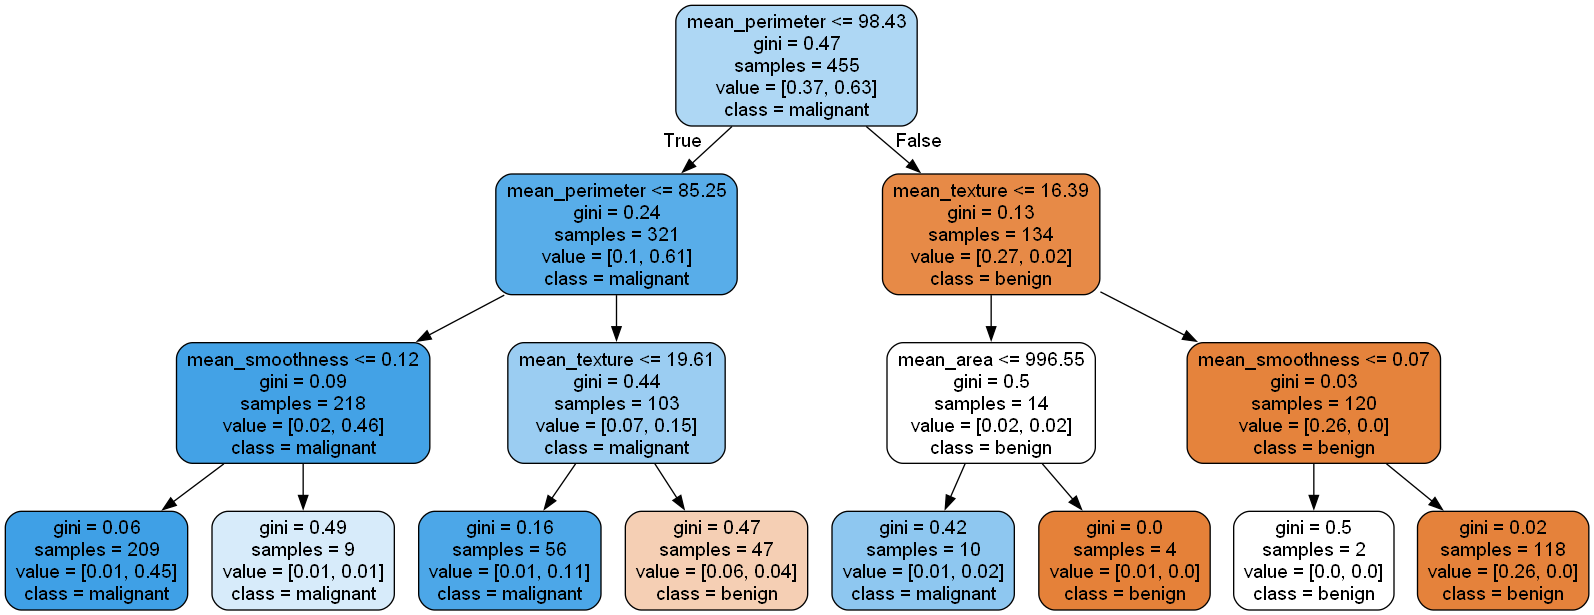

In [132]:


X_train1, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_tree = DecisionTreeClassifier(criterion="gini", random_state=50, max_depth=3)
best_tree_ada_classifier = AdaBoostClassifier(best_tree, n_estimators=50, random_state=42)
best_tree_ada_classifier.fit(X_train, y_train)

base_estimator = best_tree_ada_classifier.estimators_[0]
export_graphviz(base_estimator, out_file='tree1.dot', 
                feature_names=X_train1.columns,
                class_names=['benign', 'malignant'],
                rounded=True, proportion=False, 
                precision=2, filled=True)



subprocess.run(['C:\\Program Files\\Graphviz\\bin\\dot', '-Tpng', 'tree1.dot', '-o', 'tree.png'])


from IPython.display import Image
Image(filename='tree.png')

        Metric     Value
0     Accuracy  0.964912
1  Sensitivity  0.971831
2  Specificity  0.953488
3    Precision  0.971831


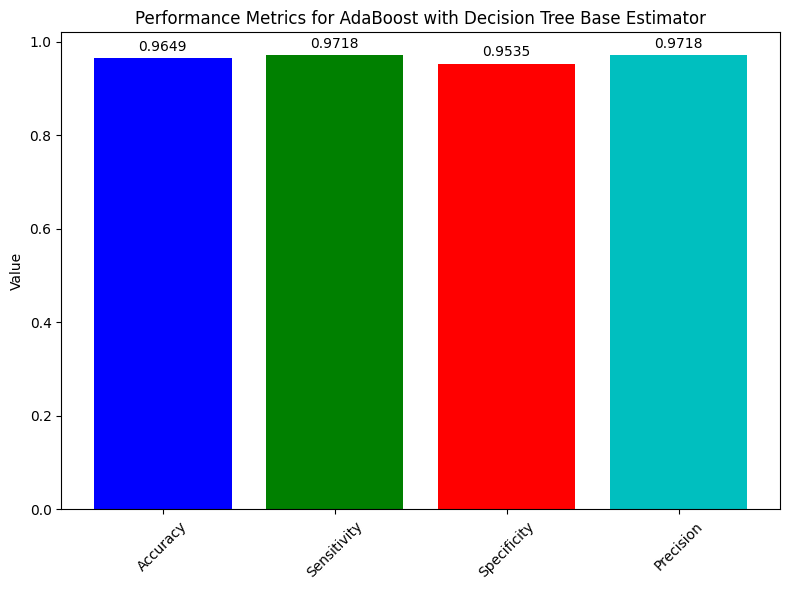

In [133]:


best_tree = DecisionTreeClassifier(criterion="gini", random_state=50, max_depth=3)
best_tree_ada_classifier = AdaBoostClassifier(best_tree, n_estimators=50, random_state=42)
best_tree_ada_classifier.fit(X_train1, y_train)

# Evaluate the AdaBoost classifier with Decision Tree base estimator
y_pred = best_tree_ada_classifier.predict(X_test)

# Calculate accuracy, sensitivity, specificity, precision, and F1-score
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
true_negatives = conf_matrix[0, 0]
false_positives = conf_matrix[0, 1]
specificity = true_negatives / (true_negatives + false_positives)
precision = precision_score(y_test, y_pred)

# Create a DataFrame to display the metrics
results_DecisionTreeClassifier_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision'],
    'Value': [accuracy, recall, specificity, precision],
})


print(results_DecisionTreeClassifier_df)

# Create a bar chart to visualize the metrics
fig, ax = plt.subplots(figsize=(8, 6))

bars = ax.bar(results_DecisionTreeClassifier_df['Metric'], results_DecisionTreeClassifier_df['Value'], color=['b', 'g', 'r', 'c', 'm'])
ax.set_ylabel('Value')
ax.set_title('Performance Metrics for AdaBoost with Decision Tree Base Estimator')



for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3), 
        textcoords="offset points",
        ha='center', va='bottom')



plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\19173\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\19173\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


  Impurity  Accuracy  Sensitivity  Specificity  Precision
0     gini  0.956140     0.957746     0.953488   0.971429
1  entropy  0.964912     0.971831     0.953488   0.971831


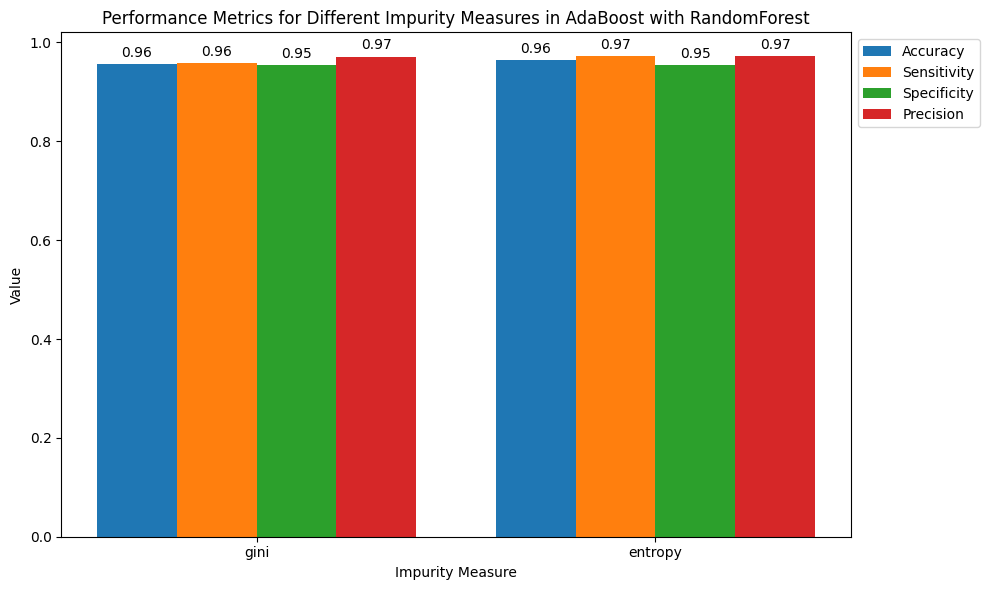

In [134]:


impurity_measures = ['gini', 'entropy']
results = []

for impurity in impurity_measures:
    rfc = RandomForestClassifier(n_estimators=10, criterion=impurity)
    ada_classifier = AdaBoostClassifier(base_estimator=rfc, n_estimators=50, random_state=42)
    ada_classifier.fit(X_train1, y_train)
    y_pred = ada_classifier.predict(X_test)

    # Calculate accuracy, sensitivity, specificity, and precision
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    true_negatives = conf_matrix[0, 0]
    false_positives = conf_matrix[0, 1]
    specificity = true_negatives / (true_negatives + false_positives)
    precision = precision_score(y_test, y_pred)

    results.append({
        'Impurity': impurity,
        'Accuracy': accuracy ,
        'Sensitivity': recall,
        'Specificity': specificity,
        'Precision': precision,
    })

results_df = pd.DataFrame(results)
print(results_df)

# Plot the metrics for each impurity measure
metrics = ['Accuracy', 'Sensitivity', 'Specificity', 'Precision']
values = [results_df['Accuracy'], results_df['Sensitivity'], results_df['Specificity'], results_df['Precision']]

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.2
index = np.arange(len(impurity_measures))

for i, (metric, value) in enumerate(zip(metrics, values)):
    bars = ax.bar(index + i * bar_width, value, bar_width, label=metric)
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

ax.set_xlabel('Impurity Measure')
ax.set_ylabel('Value')
ax.set_title('Performance Metrics for Different Impurity Measures in AdaBoost with RandomForest')
ax.set_xticks(index + bar_width * 1.5)
ax.set_xticklabels(impurity_measures)
legend = ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


        Metric     Value
0     Accuracy  0.956140
1  Sensitivity  0.957746
2  Specificity  0.953488
3    Precision  0.971429


C:\Users\19173\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


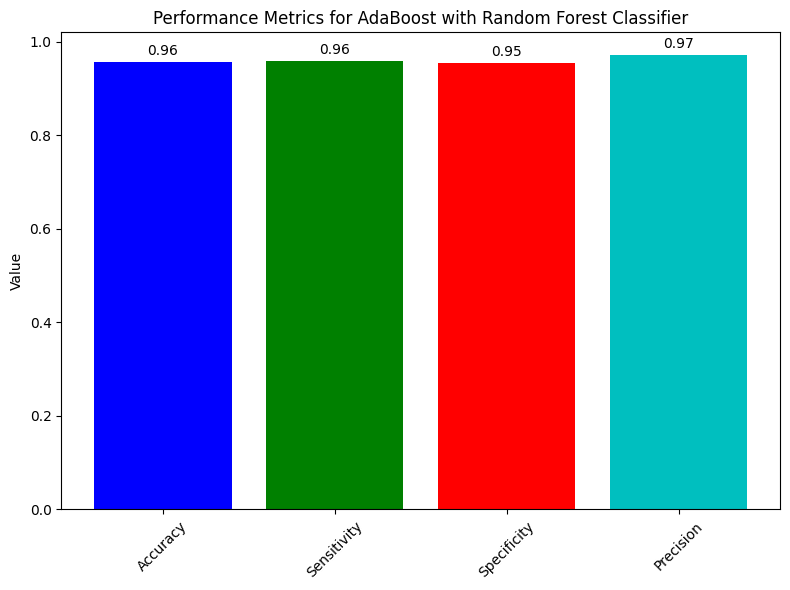

In [135]:


impurity = 'gini'

rfc = RandomForestClassifier(n_estimators=10, criterion=impurity)
ada_classifier = AdaBoostClassifier(base_estimator=rfc, n_estimators=50, random_state=42)
ada_classifier.fit(X_train1, y_train)
y_pred = ada_classifier.predict(X_test)


# Calculate accuracy, sensitivity, specificity, precision, and F1-score
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
true_negatives = conf_matrix[0, 0]
false_positives = conf_matrix[0, 1]
specificity = true_negatives / (true_negatives + false_positives)
precision = precision_score(y_test, y_pred)

# Create a DataFrame to display the metrics
results_RandomForestClassifier_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision'],
    'Value': [accuracy, recall, specificity, precision],
})


print(results_RandomForestClassifier_df)

# Create a bar chart to visualize the metrics
fig, ax = plt.subplots(figsize=(8, 6))

bars = ax.bar(results_RandomForestClassifier_df['Metric'], results_RandomForestClassifier_df['Value'], color=['b', 'g', 'r', 'c', 'm'])
ax.set_ylabel('Value')
ax.set_title('Performance Metrics for AdaBoost with Random Forest Classifier')



for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 3), 
        textcoords="offset points",
        ha='center', va='bottom')



plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Compare all of the models side by side to compare and evaulate the strengths and weakness of each**

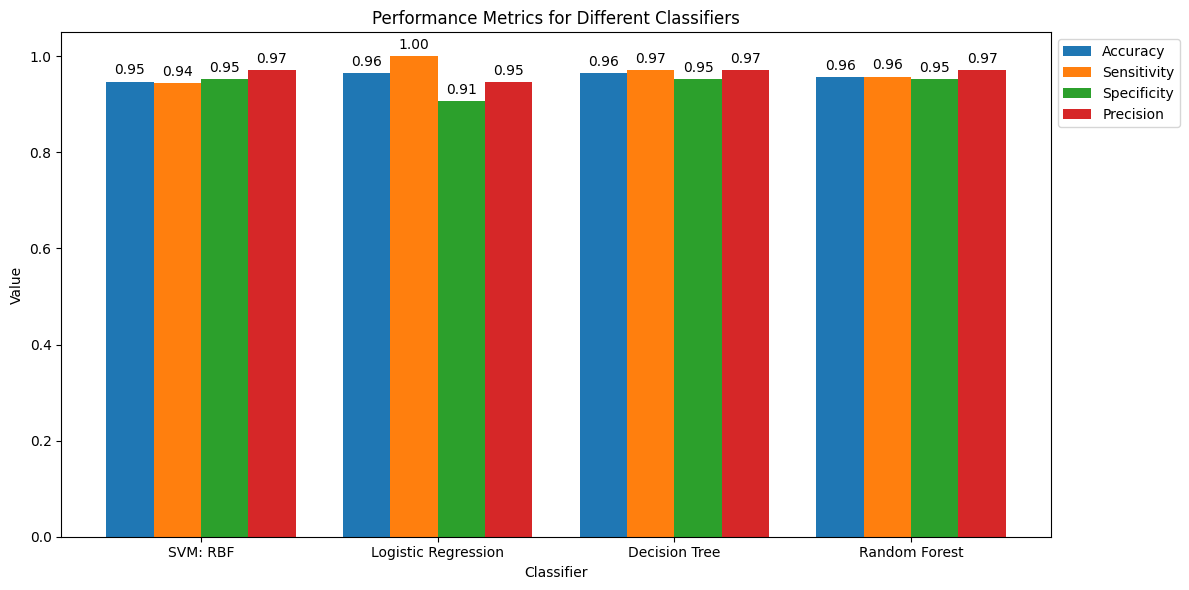

In [157]:

# Create a list of DataFrames for each classifier
classifier_dfs = [results_rbf_df, results_LogisticRegression_df, results_DecisionTreeClassifier_df, results_RandomForestClassifier_df]

# Define the classifiers corresponding to each DataFrame
classifiers = ['SVM: RBF','Logistic Regression', 'Decision Tree', 'Random Forest']

# Define the metrics you want to plot
metrics = ['Accuracy', 'Sensitivity', 'Specificity', 'Precision']

# Create empty lists to store metric values for each classifier
accuracy_values = []
sensitivity_values = []
specificity_values = []
precision_values = []

# Loop through each classifier DataFrame and collect metric values
for classifier_df in classifier_dfs:
    accuracy_values.append(classifier_df[classifier_df['Metric'] == 'Accuracy']['Value'].values[0])
    sensitivity_values.append(classifier_df[classifier_df['Metric'] == 'Sensitivity']['Value'].values[0])
    specificity_values.append(classifier_df[classifier_df['Metric'] == 'Specificity']['Value'].values[0])
    precision_values.append(classifier_df[classifier_df['Metric'] == 'Precision']['Value'].values[0])

# Create a figure and axis for the grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.2
index = np.arange(len(classifiers))

# Define the values list for plotting
values = [accuracy_values, sensitivity_values, specificity_values, precision_values]

# Loop through each metric and plot a grouped bar chart
for i, metric in enumerate(metrics):
    metric_values = [values[i][j] for j in range(len(classifiers))]
    bars = ax.bar(index + i * bar_width, metric_values, bar_width, label=metric)
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Set labels and title
ax.set_xlabel('Classifier')
ax.set_ylabel('Value')
ax.set_title('Performance Metrics for Different Classifiers')
ax.set_xticks(index + bar_width * 1.5)
ax.set_xticklabels(classifiers)
legend = ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


**In summary, each model demonstrated commendable performance, with metrics exceeding 90% across the board. Notably, Logistic Regression achieved 100% sensitivity, a crucial feature for detecting all true positives in cancer prediction. However, its specificity is the lowest among the models, indicating a higher rate of false positives, which can be detrimental to patients. Given the gravity of cancer diagnosis, professional medical evaluation is imperative alongside any prediction model. The decision tree model shows the most balanced results, suggesting that its use in conjunction with a doctor's expertise could significantly enhance both the accuracy and efficiency of cancer diagnosis. Nevertheless, there's a pressing need for further research, including the collection of additional data and exploration of various metrics and models, to aim for a 100% prediction accuracy.**  